1.introduction

This project is about classify games into success/fail games.

2.data resources

 Steam Games Dataset (Kaggle)

    https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

    Origin From: Steam Web API
 Twitch Game Data (Kaggle)

    https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch

    Origin From: Twitch API

 Steam is the world's largest digital game marketplace. It provides a wealth of useful information, such as pricing and user reviews, which can help us predict whether a game will be successful. Twitch, on the other hand, is the mainstream game live streaming platform. It can reflect a game's popularity through metrics like total watch time and viewer count.



3.load data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n1. Loading...")
df_steam_raw = pd.read_csv('../Data/games.csv')

print(f"SteamShape: {df_steam_raw.shape}")
print(f"SteamColumns: {df_steam_raw.columns.tolist()[:10]}...")

df_twitch_raw = pd.read_csv('../Data/Twitch_game_data.csv', encoding='latin-1')

print(f"\nTwitchShape: {df_twitch_raw.shape}")
print(f"TwitchColumns: {df_twitch_raw.columns.tolist()}")

# 显示样本
print("\nSteamSample:")
print(df_steam_raw.head(3))

print("\nTwitchSample:")
print(df_twitch_raw.head(3))


1. Loading...
SteamShape: (111452, 39)
SteamColumns: ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DiscountDLC count', 'About the game', 'Supported languages']...

TwitchShape: (21000, 12)
TwitchColumns: ['Rank', 'Game', 'Month', 'Year', 'Hours_watched', 'Hours_streamed', 'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels', 'Avg_viewer_ratio']

SteamSample:
                    AppID          Name Release date  Estimated owners  \
20200    Galactic Bowling  Oct 21, 2008    0 - 20000                 0   
655370       Train Bandit  Oct 12, 2017    0 - 20000                 0   
1732930      Jolt Project  Nov 17, 2021    0 - 20000                 0   

         Peak CCU  Required age  Price  DiscountDLC count  \
20200           0         19.99      0                  0   
655370          0          0.99      0                  0   
1732930         0          4.99      0                  0   

                           

4. check data


2. Checking before cleaning...

SteamData
--------------------------------------------------
FirstRaw(AppID): ['Galactic Bowling', 'Train Bandit', 'Jolt Project', 'Henosis™', 'Two Weeks in Painland']
SecondRaw: ['Oct 21, 2008', 'Oct 12, 2017', 'Nov 17, 2021', 'Jul 23, 2020', 'Feb 3, 2020']

The first column of the CSV file (AppID) is missing a header, which is causing all other columns to be misaligned.

TwitchData
--------------------------------------------------
Missing Value Statistics:
Game    1
dtype: int64
TwitchData: OK 


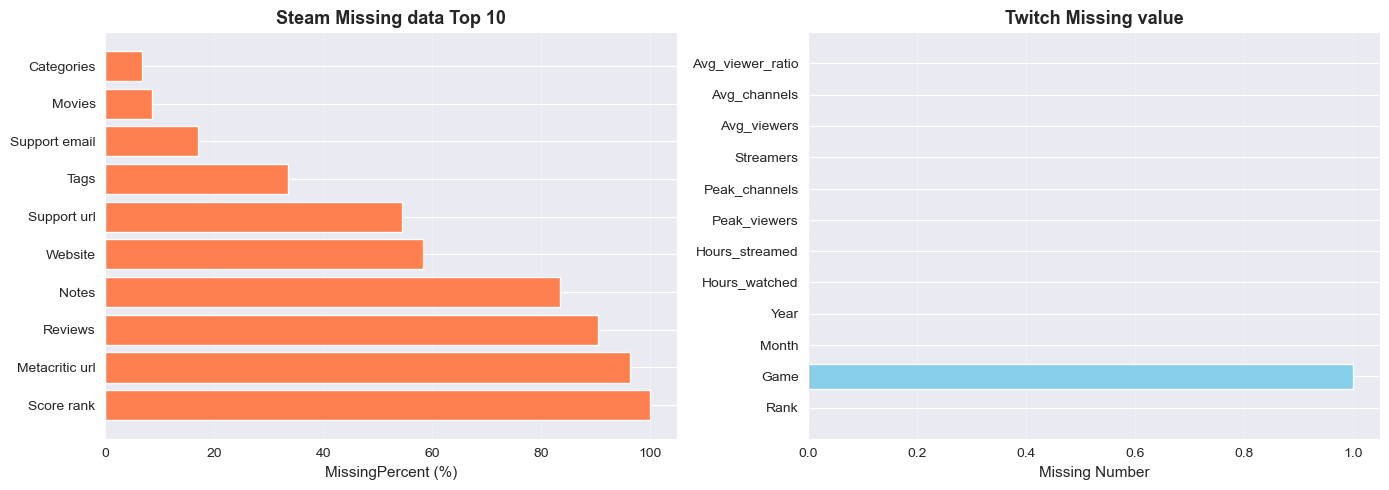


pic saved: missing_values_before_cleaning.png


In [20]:
print("\n2. Checking before cleaning...")

print("\nSteamData")
print("-" * 50)

print(f"FirstRaw(AppID): {df_steam_raw['AppID'].head(5).tolist()}")
print(f"SecondRaw: {df_steam_raw['Name'].head(5).tolist()}")

print("\nThe first column of the CSV file (AppID) is missing a header, which is causing all other columns to be misaligned.")


print("\nTwitchData")
print("-" * 50)
print(f"Missing Value Statistics:")
print(df_twitch_raw.isnull().sum()[df_twitch_raw.isnull().sum() > 0])
print(f"TwitchData: OK ")

# missing value picture
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Steam missing value
steam_missing = df_steam_raw.isnull().sum()
steam_missing_pct = (steam_missing / len(df_steam_raw) * 100)
top_missing = steam_missing_pct.nlargest(10)

ax1.barh(range(len(top_missing)), top_missing.values, color='coral')
ax1.set_yticks(range(len(top_missing)))
ax1.set_yticklabels(top_missing.index)
ax1.set_xlabel('MissingPercent (%)', fontsize=11)
ax1.set_title('Steam Missing data Top 10', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Twitch missing value
twitch_missing = df_twitch_raw.isnull().sum()
twitch_missing_pct = (twitch_missing / len(df_twitch_raw) * 100)

if twitch_missing.sum() == 0:
    ax2.text(0.5, 0.5, 'no missing',
             transform=ax2.transAxes, ha='center', va='center',
             fontsize=16, fontweight='bold', color='green')
    ax2.set_title('Twitch Missing Value', fontsize=13, fontweight='bold')
    ax2.axis('off')
else:
    ax2.barh(range(len(twitch_missing)), twitch_missing.values, color='skyblue')
    ax2.set_yticks(range(len(twitch_missing)))
    ax2.set_yticklabels(twitch_missing.index)
    ax2.set_xlabel('Missing Number', fontsize=11)
    ax2.set_title('Twitch Missing value', fontsize=13, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('missing_values_before_cleaning.png', dpi=300, bbox_inches='tight')
plt.show()

print("\npic saved: missing_values_before_cleaning.png")

5. Fix steam data

In [21]:
print("\n3. SteamDataCleaning...")

print("\n3.1 fix column names")
print("-" * 50)

correct_column_names = [
    'AppID', 'Name', 'Release_date', 'Estimated_owners',
    'Peak_CCU', 'Required_age', 'Price', 'Discount',
    'DLC_count', 'About_the_game', 'Supported_languages',
    'Full_audio_languages', 'Reviews', 'Header_image',
    'Website', 'Support_url', 'Support_email', 'Windows',
    'Mac', 'Linux', 'Metacritic_score', 'Metacritic_url',
    'User_score', 'Positive', 'Negative', 'Score_rank',
    'Achievements', 'Recommendations', 'Notes',
    'Average_playtime_forever', 'Average_playtime_two_weeks',
    'Median_playtime_forever', 'Median_playtime_two_weeks',
    'Developers', 'Publishers', 'Categories', 'Genres',
    'Tags', 'Screenshots', 'Movies'
]

# change header
df_steam = pd.read_csv('../Data/games.csv', skiprows=1, names=correct_column_names)

print(f"DataAfterFixing: {df_steam.shape}")

# Test
print("\ntest column names:")
print(f"  AppID : {df_steam['AppID'].head(3).tolist()}")
print(f"  Name : {df_steam['Name'].head(3).tolist()}")
print(f"  Price : {df_steam['Price'].head(3).tolist()}")
print(f"  Positive : {df_steam['Positive'].head(3).tolist()}")

print("\n SteamDataFixed")


3. SteamDataCleaning...

3.1 fix column names
--------------------------------------------------
DataAfterFixing: (111452, 40)

test column names:
  AppID : [20200, 655370, 1732930]
  Name : ['Galactic Bowling', 'Train Bandit', 'Jolt Project']
  Price : [19.99, 0.99, 4.99]
  Positive : [6, 53, 0]

 SteamDataFixed


6. filter of steam data

In [22]:

print("\n3.2: data filtering and cleaning")
print("-" * 50)

# size before cleaning
initial_size = len(df_steam)

# Delete rows with missing values in key columns
df_steam = df_steam.dropna(subset=['Name', 'Positive', 'Negative'])
print(f"Delete rows with missing values in key columns: {initial_size - len(df_steam)} ")

# Keep only games with sufficient reviews (at least 50 reviews)
df_steam = df_steam[(df_steam['Positive'] + df_steam['Negative']) >= 50]
print(f"Keep only games with sufficient reviews: {len(df_steam)} ")

# Handle price outliers (prices > $200 are likely errors)
df_steam = df_steam[df_steam['Price'] <= 200]
print(f"Handle price outliers: {len(df_steam)} ")

# Fill missing values in the Platform column.
df_steam['Windows'] = df_steam['Windows'].fillna(False)
df_steam['Mac'] = df_steam['Mac'].fillna(False)
df_steam['Linux'] = df_steam['Linux'].fillna(False)

print(f"\nFinalSteamData: {df_steam.shape}")


3.2: data filtering and cleaning
--------------------------------------------------
Delete rows with missing values in key columns: 6 
Keep only games with sufficient reviews: 25127 
Handle price outliers: 25126 

FinalSteamData: (25126, 40)


7. gather of twitch data

In [23]:
print("\n4. Twitch Data Gathering...")

print("-" * 50)

# clean names
df_steam['name_clean'] = df_steam['Name'].str.strip().str.lower()
df_twitch_raw['name_clean'] = df_twitch_raw['Game'].str.strip().str.lower()

# Gather the monthly twitch data
print("Before Gathering: Every games has many monthly data")
print(f"Example: League of Legends has {df_twitch_raw[df_twitch_raw['Game']=='League of Legends'].shape[0]} datas")

df_twitch = df_twitch_raw.groupby('name_clean').agg({
    'Game': 'first',
    'Hours_watched': 'sum',           # Total Watch Time
    'Hours_streamed': 'sum',          # Total Livestream Time
    'Peak_viewers': 'max',            # Peak viewers
    'Avg_viewers': 'mean',            # Avg viewers
    'Streamers': 'sum',               # Streamers
    'Avg_viewer_ratio': 'mean',       # avg viewer ratio
    'Month': 'count'                  # number of month
}).reset_index()

df_twitch.rename(columns={'Month': 'months_tracked'}, inplace=True)

print(f"\nAfter Gathering: Each game only has a monthly data")
print(f"Twitch Game numbers: {len(df_twitch)}")

# Result
print("\nTop 5 Game after gathering: ")
print(df_twitch.nlargest(5, 'Hours_watched')[['Game', 'Hours_watched', 'Avg_viewers', 'months_tracked']])


4. Twitch Data Gathering...
--------------------------------------------------
Before Gathering: Every games has many monthly data
Example: League of Legends has 105 datas

After Gathering: Each game only has a monthly data
Twitch Game numbers: 2334

Top 5 Game after gathering: 
                    Game  Hours_watched    Avg_viewers  months_tracked
959        Just Chatting    14397469625  270407.726027              73
1022   League of Legends    11296781271  147535.047619             105
783   Grand Theft Auto V     7482026514   97672.457143             105
701             Fortnite     6224642826   98056.954023              87
2194            VALORANT     4631862775  117713.907407              54


8. merge data


5. merge Steam and Twitch data...
--------------------------------------------------
SteamData: 25126 games
Twitch数据: 2334 games
Matched: 1189 games
MatchRate: 50.9%

show matched games example:
                            Name  Price  Positive  Negative  Hours_watched
              Grand Theft Auto V   0.00   1171197    210154     7482026514
                          Dota 2   0.00   1477153    300437     4503767707
Counter-Strike: Global Offensive   0.00   5764420    766677     4315553263
                Dead by Daylight   7.99    494648    112924     1400273078
                            Rust  39.99    703687    108223     1169678364
                  Counter-Strike   9.99    198387      5135      876395705
                   Path of Exile   0.00    167454     16653      755583485
                        Lost Ark   0.00    124308     44066      662177548
                        Among Us   3.99    577656     51069      659690733
                       Destiny 2   0.00    403109     

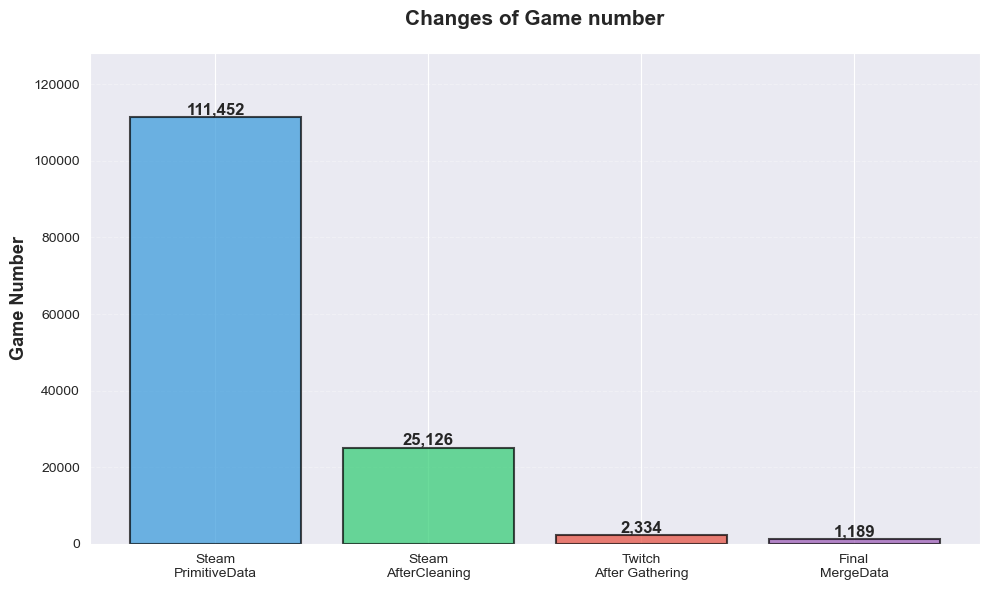


 saved in: data_processing_flow.png


In [24]:

print("\n5. merge Steam and Twitch data...")
print("-" * 50)

# merge
df_merged = df_steam.merge(
    df_twitch,
    on='name_clean',
    how='inner'  # 只保留同时存在于两个数据集的游戏
)

print(f"SteamData: {len(df_steam)} games")
print(f"Twitch数据: {len(df_twitch)} games")
print(f"Matched: {len(df_merged)} games")
print(f"MatchRate: {len(df_merged)/len(df_twitch)*100:.1f}%")

# show matched games
print("\nshow matched games example:")
sample_games = df_merged.nlargest(10, 'Hours_watched')[['Name', 'Price', 'Positive', 'Negative', 'Hours_watched']]
print(sample_games.to_string(index=False))

# visual
fig, ax = plt.subplots(figsize=(10, 6))


categories = ['Steam\nPrimitiveData', 'Steam\nAfterCleaning', 'Twitch\nAfter Gathering', 'Final\nMergeData']
values = [111452, len(df_steam), len(df_twitch), len(df_merged)]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']

bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# set values
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:,}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Game Number', fontsize=13, fontweight='bold')
ax.set_title('Changes of Game number', fontsize=15, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, max(values) * 1.15)

plt.tight_layout()
plt.savefig('data_processing_flow.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n saved in: data_processing_flow.png")

9.Feature Engineering

In [26]:

print("\n6. Feature Engineering...")
print("-" * 50)

# Steam Features
print("Create Steam Features...")
df_merged['positive_ratio'] = df_merged['Positive'] / (df_merged['Positive'] + df_merged['Negative'])
df_merged['total_reviews'] = df_merged['Positive'] + df_merged['Negative']
df_merged['platform_count'] = (
    df_merged['Windows'].astype(int) +
    df_merged['Mac'].astype(int) +
    df_merged['Linux'].astype(int)
)
df_merged['is_free'] = (df_merged['Price'] == 0).astype(int)

print("  positive_ratio")
print("  total_reviews ")
print("  platform_count ")
print("  is_free ")

# Twitch Features
print("\nCreate Twitch Feature...")
df_merged['watch_per_stream_hour'] = (
    df_merged['Hours_watched'] / df_merged['Hours_streamed']
).replace([np.inf, -np.inf], 0)

print("  watch_per_stream_hour ")

# Combined Features
print("\nCreate Combined Features...")
# Make it smooth
df_merged['streaming_popularity'] = np.log1p(df_merged['Hours_watched'])
# Find games with both high viewers and reviews.
df_merged['community_engagement'] = (
    np.log1p(df_merged['total_reviews']) *
    np.log1p(df_merged['Avg_viewers'])
)

print("  streaming_popularity ")
print("  community_engagement ")

print(f"\nFeature Engineering finished.")


6. Feature Engineering...
--------------------------------------------------
Create Steam Features...
  positive_ratio
  total_reviews 
  platform_count 
  is_free 

Create Twitch Feature...
  watch_per_stream_hour 

Create Combined Features...
  streaming_popularity 
  community_engagement 

Feature Engineering finished.


10. deal with 0 value

In [27]:

print("\ndeal with 0 value...")
print("-" * 50)

# 1. Metacritic_score
if 'Metacritic_score' in df_merged.columns:
    zero_count = (df_merged['Metacritic_score'] == 0).sum()
    print(f"Metacritic_score's 0 value: {zero_count} ({zero_count/len(df_merged)*100:.1f}%)")

    # set value with median
    non_zero_values = df_merged[df_merged['Metacritic_score'] > 0]['Metacritic_score']
    if len(non_zero_values) > 0:
        median_score = non_zero_values.median()
        df_merged['Metacritic_score'] = df_merged['Metacritic_score'].replace(0, median_score)
        print(f"  Using median {median_score:.0f} to fill")
    else:
        print(f"  All values are zero, delete this column")
        df_merged = df_merged.drop('Metacritic_score', axis=1)

# 2. User_score
if 'User_score' in df_merged.columns:
    zero_pct = (df_merged['User_score'] == 0).sum() / len(df_merged) * 100
    print(f"\nUser_score's 0 value: {(df_merged['User_score'] == 0).sum()} ({zero_pct:.1f}%)")

    if zero_pct > 90:  #
        print(f" All values are zero, delete this column")
        df_merged = df_merged.drop('User_score', axis=1)

# 3. Achievements and Peak_CCU have true 0 value
print(f"\n Achievements and Peak_CCU have true 0 value")

print("\n0 value finished")



deal with 0 value...
--------------------------------------------------
Metacritic_score's 0 value: 659 (55.4%)
  Using median 80 to fill

User_score's 0 value: 1189 (100.0%)
 All values are zero, delete this column

 Achievements and Peak_CCU have true 0 value

0 value finished


10.Define the target

In [28]:

print("\n7. Define the target value...")
print("-" * 50)

print("A success game should have:")
print("  1. Positive Review Rate>= 85% ")
print("  AND")
print("  2. Recommendations >= 1000 OR Owners >= 100,000 ")

df_merged['success'] = (
    (df_merged['positive_ratio'] >= 0.85) &
    ((df_merged['Recommendations'] >= 1000) |
     (df_merged['Estimated_owners'].astype(str).str.contains('100000|200000|500000|1000000', na=False)))
).astype(int)

success_count = df_merged['success'].sum()
failure_count = len(df_merged) - success_count

print(f"\nTarget Variable Distribution:")
print(f"  Success Games: {success_count} ({success_count/len(df_merged)*100:.1f}%)")
print(f"  Fail Games: {failure_count} ({failure_count/len(df_merged)*100:.1f}%)")

if 0.4 <= df_merged['success'].mean() <= 0.6:
    print(f"\nThe class balance is good; no resampling is required.")
else:
    print(f"\nClass imbalance detected, processing may be required")


7. Define the target value...
--------------------------------------------------
A success game should have:
  1. Positive Review Rate>= 85% 
  AND
  2. Recommendations >= 1000 OR Owners >= 100,000 

Target Variable Distribution:
  Success Games: 592 (49.8%)
  Fail Games: 597 (50.2%)

The class balance is good; no resampling is required.


11. final preparation

In [29]:

print("\n8. final preparation...")
print("-" * 50)

# choose modeling features
modeling_features = [
    # each game should have a name for search
    'Name',
    # Steam feature
    'Price', 'positive_ratio', 'total_reviews',
    'Achievements', 'Metacritic_score', 'User_score',
    'platform_count', 'is_free',
    'Average_playtime_forever', 'Peak_CCU',
    # Twitch feature
    'Hours_watched', 'Avg_viewers', 'Peak_viewers',
    'Streamers', 'watch_per_stream_hour',
    # Combined feature
    'streaming_popularity', 'community_engagement',
    # Target value
    'success'
]

# check features
available_features = [f for f in modeling_features if f in df_merged.columns]
missing_features = [f for f in modeling_features if f not in df_merged.columns]

if missing_features:
    print(f"Missing features: {missing_features}")

df_final = df_merged[available_features].copy()

# delete missing value
initial_size = len(df_final)
df_final = df_final.dropna()
dropped = initial_size - len(df_final)

print(f"\ndelete missing value: {dropped} 行 ({dropped/initial_size*100:.1f}%)")
print(f"Final data: {df_final.shape}")

# show final features
feature_count = len([f for f in available_features if f not in ['Name', 'success']])
print(f"\nfinal features numbers: {feature_count}")
print(f"final features:")
for i, feature in enumerate(available_features, 1):
    if feature not in ['Name', 'success']:
        print(f"  {i}. {feature}")


8. final preparation...
--------------------------------------------------
Missing features: ['User_score']

delete missing value: 0 行 (0.0%)
Final data: (1189, 18)

final features numbers: 16
final features:
  2. Price
  3. positive_ratio
  4. total_reviews
  5. Achievements
  6. Metacritic_score
  7. platform_count
  8. is_free
  9. Average_playtime_forever
  10. Peak_CCU
  11. Hours_watched
  12. Avg_viewers
  13. Peak_viewers
  14. Streamers
  15. watch_per_stream_hour
  16. streaming_popularity
  17. community_engagement


12. save data

In [31]:

print("\n9. Save cleaned data...")
print("-" * 50)

# save
output_file = '../Data/steam_twitch_final_cleaned.csv'
df_final.to_csv(output_file, index=False)

print(f"Data saved into: {output_file}")
print(f"\nFile information:")
print(f"  - game numbers: {len(df_final)}")
print(f"  - feature numbers: {df_final.shape[1] - 2}")  # 减去Name和success
print(f"  - size: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


9. Save cleaned data...
--------------------------------------------------
Data saved into: ../Data/steam_twitch_final_cleaned.csv

File information:
  - game numbers: 1189
  - feature numbers: 16
  - size: 0.23 MB
